## Kyphosis Disease prediction using Simple Neural Network (NN) model and XGBoost model with GridSearchCV

### Installing & Importing libraries

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [40]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [57]:
pip install xgboost

You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import sys
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Load Kyphosis dataset

In [2]:
data = pd.read_csv('kyphosis.csv')
data.head(15)

,rownames,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15
5,6,absent,1,2,16
6,7,absent,61,2,17
7,8,absent,37,3,16
8,9,absent,113,2,16
9,10,present,59,6,12


### Data preprocessing


#### Drop unused column

In [3]:
data.drop('rownames', axis=1, inplace=True)

In [4]:
data.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


##### Description of Kyphosis dataset

In [5]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


C:\Users\REAL\AppData\Local\Temp\ipykernel_5220\2955418061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visualize.index, y=visualize.values, palette='Set1')


<Axes: xlabel='Kyphosis'>

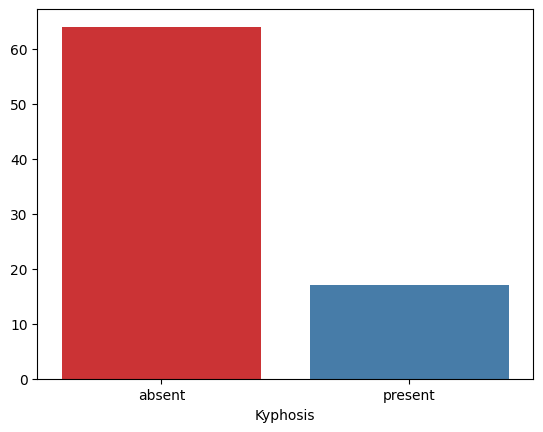

In [6]:
visualize = data['Kyphosis'].value_counts()
sns.barplot(x=visualize.index, y=visualize.values, palette='Set1')

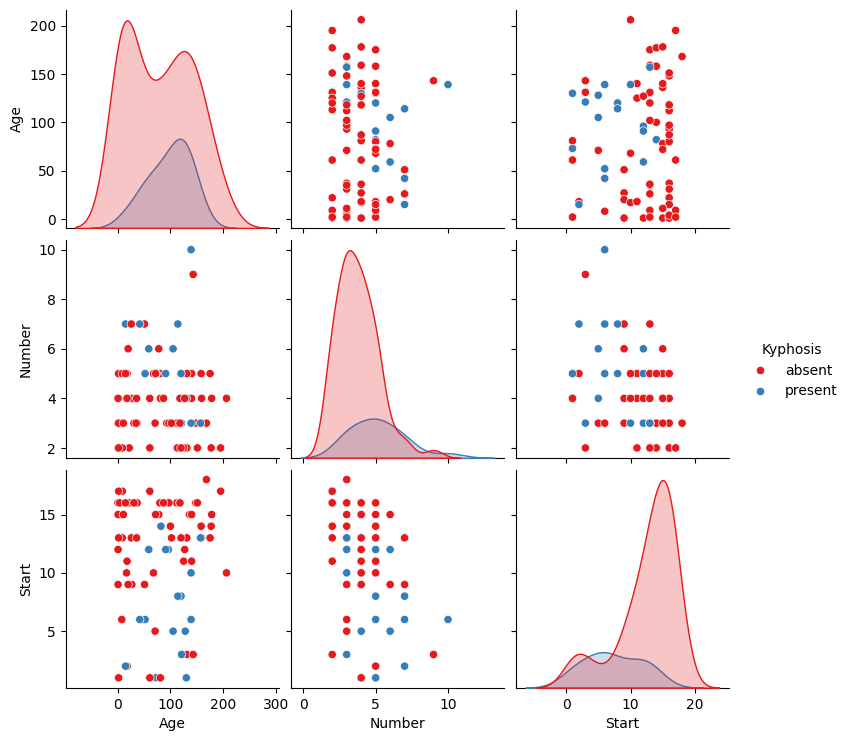

In [7]:
sns.pairplot(data, hue='Kyphosis', palette='Set1')

#### If you see the above Kyphosis visualization "barplot", there is imblanced data between absent and present class. The "absent" class is high as compared to "present" class. To resolve this proble we have to perform over-sampling. It include increasing the number of samples in the minority class to match the majority class. There are two popular over-sampling method include "SMOTE" and "ADASYN". We are going to use SMOTE technique.

##### Separate features (X) and target (y)


In [8]:
X = data.drop('Kyphosis', axis=1)
Y = data['Kyphosis']

In [9]:
print('Size of x :- ', sys.getsizeof(X))
print('Size of y :- ', sys.getsizeof(Y))

Size of x :-  2088
Size of y :-  5264


##### Apply over-sampling using SMOTE


In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = smote.fit_resample(X, Y)

##### Now, x_resampled and y_resampled contain the balanced dataset. 


In [11]:
balanced_Kyphosis = pd.concat([x_resampled, y_resampled], axis=1)
balanced_Kyphosis.to_csv('balanced_kyphosis_data.csv', index=False)

In [12]:
df = pd.read_csv('balanced_kyphosis_data.csv')
df.head(10)

,Age,Number,Start,Kyphosis
0,71,3,5,absent
1,158,3,14,absent
2,128,4,5,present
3,2,5,1,absent
4,1,4,15,absent
5,1,2,16,absent
6,61,2,17,absent
7,37,3,16,absent
8,113,2,16,absent
9,59,6,12,present


##### Description of Kyphosis dataset after resampling using SMOTE

In [13]:
df.describe()

,Age,Number,Start
count,128.000000,128.000000,128.000000
mean,89.289062,4.328125,9.523438
std,52.256357,1.516883,5.092785
min,1.000000,2.000000,1.000000
25%,48.750000,3.000000,5.000000
50%,100.500000,4.000000,10.000000
75%,129.250000,5.000000,14.000000
max,206.000000,10.000000,18.000000


C:\Users\REAL\AppData\Local\Temp\ipykernel_5220\2195975019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_visualize.index, y=balance_visualize.values, palette='Set1')


<Axes: xlabel='Kyphosis'>

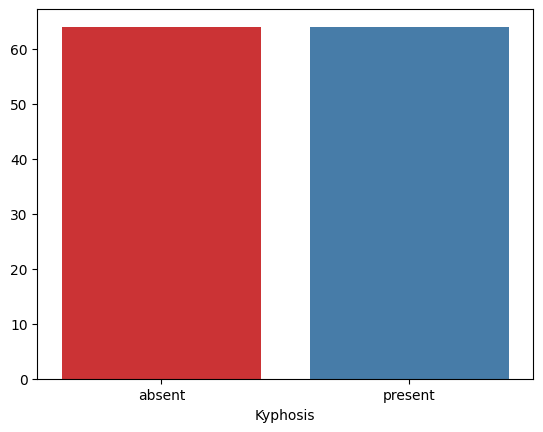

In [14]:
balance_visualize = df['Kyphosis'].value_counts()
sns.barplot(x=balance_visualize.index, y=balance_visualize.values, palette='Set1')

##### Split feature(x) and target(y) after resampling using "SMOTE" technique

In [15]:
x = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']
print('Size of x :- ', sys.getsizeof(x))
print('Size of y :- ', sys.getsizeof(y))

Size of x :-  3216
Size of y :-  8272


##### Initialize the label encoder, because target class contain data in "str" format such as 'present' and 'absent'
##### Encode the target variable


In [16]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [17]:
y_encoded

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Split the data into training and testing sets


##### Note:- Using "stratify=Y" can help ensure that each class is represented proportionally in both the training and testing sets. This is important to prevent the model from being biased toward the majority class.

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

### Standardize the features


In [19]:
scale = StandardScaler()
x_train = scale.fit_transform(xtrain)
x_test = scale.fit_transform(xtest)

## Define and build a simple neural network(NN) model for Kyphosis disease detection


In [20]:
class NNKyphosisClassifier(nn.Module):
    def __init__(self):
        super(NNKyphosisClassifier, self).__init__()
        self.layer1 = nn.Linear(3,64)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(64,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, X):
        X = self.layer1(X)
        X = self.activation1(X)
        X = self.layer2(X)
        X = self.sigmoid(X)
        return X

#### Create the Neural Network (NN) model.

In [21]:
neural_network_model = NNKyphosisClassifier()

#### Define the loss function and optimizer for model training.


In [22]:
criterion = nn.BCEWithLogitsLoss()    # Binary Cross-Entropy Loss
optimizer = optim.Adam(neural_network_model.parameters(), lr=0.001)

#### Convert data to PyTorch tensors.


In [23]:
X_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(ytrain).view(-1,1)    # Reshape for binary classification

#### Training the NN model for Kyphosis disease detection

In [24]:
start = timer()
for epoch in range(100):
    optimizer.zero_grad()
    outputs = neural_network_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
print('Required time for training the neural network model:- ', timer() - start) 

Required time for training the neural network model:-  0.34682370000001583


#### Convert test data to PyTorch tensor.


In [25]:
X_test = torch.FloatTensor(x_test)

#### Make predictions using the trained model


In [26]:
with torch.no_grad():
    neural_network_model.eval()
    predictions = neural_network_model(X_test)

#### Convert the predictions to a numpy array


In [27]:
predicted_label = (predictions>0.5).numpy().flatten()   # it's a binary classification (0 or 1)

In [28]:
actual_labels = ytest == 1   # Assuming 1 represents "present," adjust as needed

#### Calculate the model evaluation

In [29]:
cm = confusion_matrix(actual_labels, predicted_label)
accuracy = accuracy_score(actual_labels, predicted_label)
precision= precision_score(actual_labels, predicted_label)
recall = recall_score(actual_labels, predicted_label)
f1 = f1_score(actual_labels, predicted_label)
cr = classification_report(actual_labels, predicted_label)

#### Display actual and predicted results


In [30]:
start = timer()
print('(***********True for "1" and False for "0"***********)')
for actual, predicted in zip(actual_labels,predicted_label):
    print(f'Actual: {actual}, Predicted: {predicted}')
print("Timer for prediction :- ", timer() - start)

(***********True for "1" and False for "0"***********)
Actual: True, Predicted: True
Actual: True, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: True
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: False
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: True, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: True
Actual: False, Predicted: True
Actual: True, Predicted: True
Timer for prediction :-  0.0012691000000017993


#### Display overall evaluation metrics

In [32]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix: \n', cm)
print('Classification report: \n', cr)

Accuracy: 0.85
Precision: 0.91
Recall: 0.77
F1-Score: 0.83
Confusion Matrix: 
 [[12  1]
 [ 3 10]]
Classification report: 
               precision    recall  f1-score   support

       False       0.80      0.92      0.86        13
        True       0.91      0.77      0.83        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



## Define and build Gradient Boosting (XGBoost) model for Kyphosis disease prediction

In [33]:
import xgboost as xgb
# Create and train the XGBoost model
XGB_model = xgb.XGBClassifier()

##### Optimizing the parameters of your XGBoost model for the Kyphosis dataset can be done using hyperparameter tuning techniques. You can use Grid Search or Randomized Search to find the best combination of hyperparameters. Here we are going to use "Grid Search"

In [55]:
# Define a grid of hyperparameters to search (Hyperparameter tunning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 3]
    # Add more hyperparameters to search and their respective values
}

#### Perform Grid Search with cross-validation


In [35]:
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy', cv=5)

In [36]:
# Fit the model to find the best hyperparameters
start = timer()
grid_search.fit(x_train, ytrain)
print("Timer for model training :- ", timer() - start)

Timer for model training :-  28.024452399999973


In [54]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [37]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_
print(f'Best XGBoostModel Parameters: {best_params}')

Best XGBoostModel Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}


#### Make prediction for XGBoost model

In [38]:
xgb_prediction1 = best_xgb_model.predict(x_test)

In [39]:
start = timer()
for actual, predicted in zip(ytest,xgb_prediction1):
    print(f'Actual: {actual}, Predicted: {predicted}')
print("Timer for prediction :- ", timer() - start)

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Timer for prediction :-  0.0008927999999741587


#### Calculate XGBoost model evaluation

In [40]:
xgb_cm = confusion_matrix(ytest, xgb_prediction1)
xgb_accuracy = accuracy_score(ytest, xgb_prediction1)
xgb_precision= precision_score(ytest, xgb_prediction1)
xgb_recall = recall_score(ytest, xgb_prediction1)
xgb_f1 = f1_score(ytest, xgb_prediction1)
xgb_cr = classification_report(ytest, xgb_prediction1)

#### Display overall evaluation metrics for XGBoost model (Kyphosis dataset)

In [41]:
print(f'Accuracy: {xgb_accuracy:.2f}')
print(f'Precision: {xgb_precision:.2f}')
print(f'Recall: {xgb_recall:.2f}')
print(f'F1-Score: {xgb_f1:.2f}')
print('Confusion Matrix: \n', xgb_cm)
print('Classification report: \n', xgb_cr)

Accuracy: 0.96
Precision: 0.93
Recall: 1.00
F1-Score: 0.96
Confusion Matrix: 
 [[12  1]
 [ 0 13]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



#### XGBoost with GridSearchCV model visualization

##### Assuming 'results' is a dictionary containing hyperparameter results from GridSearchCV


In [45]:
results = grid_search.cv_results_

##### Extract the hyperparameters and corresponding accuracy scores


In [46]:
param_combinations = results['params']
accuracy_scores = results['mean_test_score']

##### Plot the results 

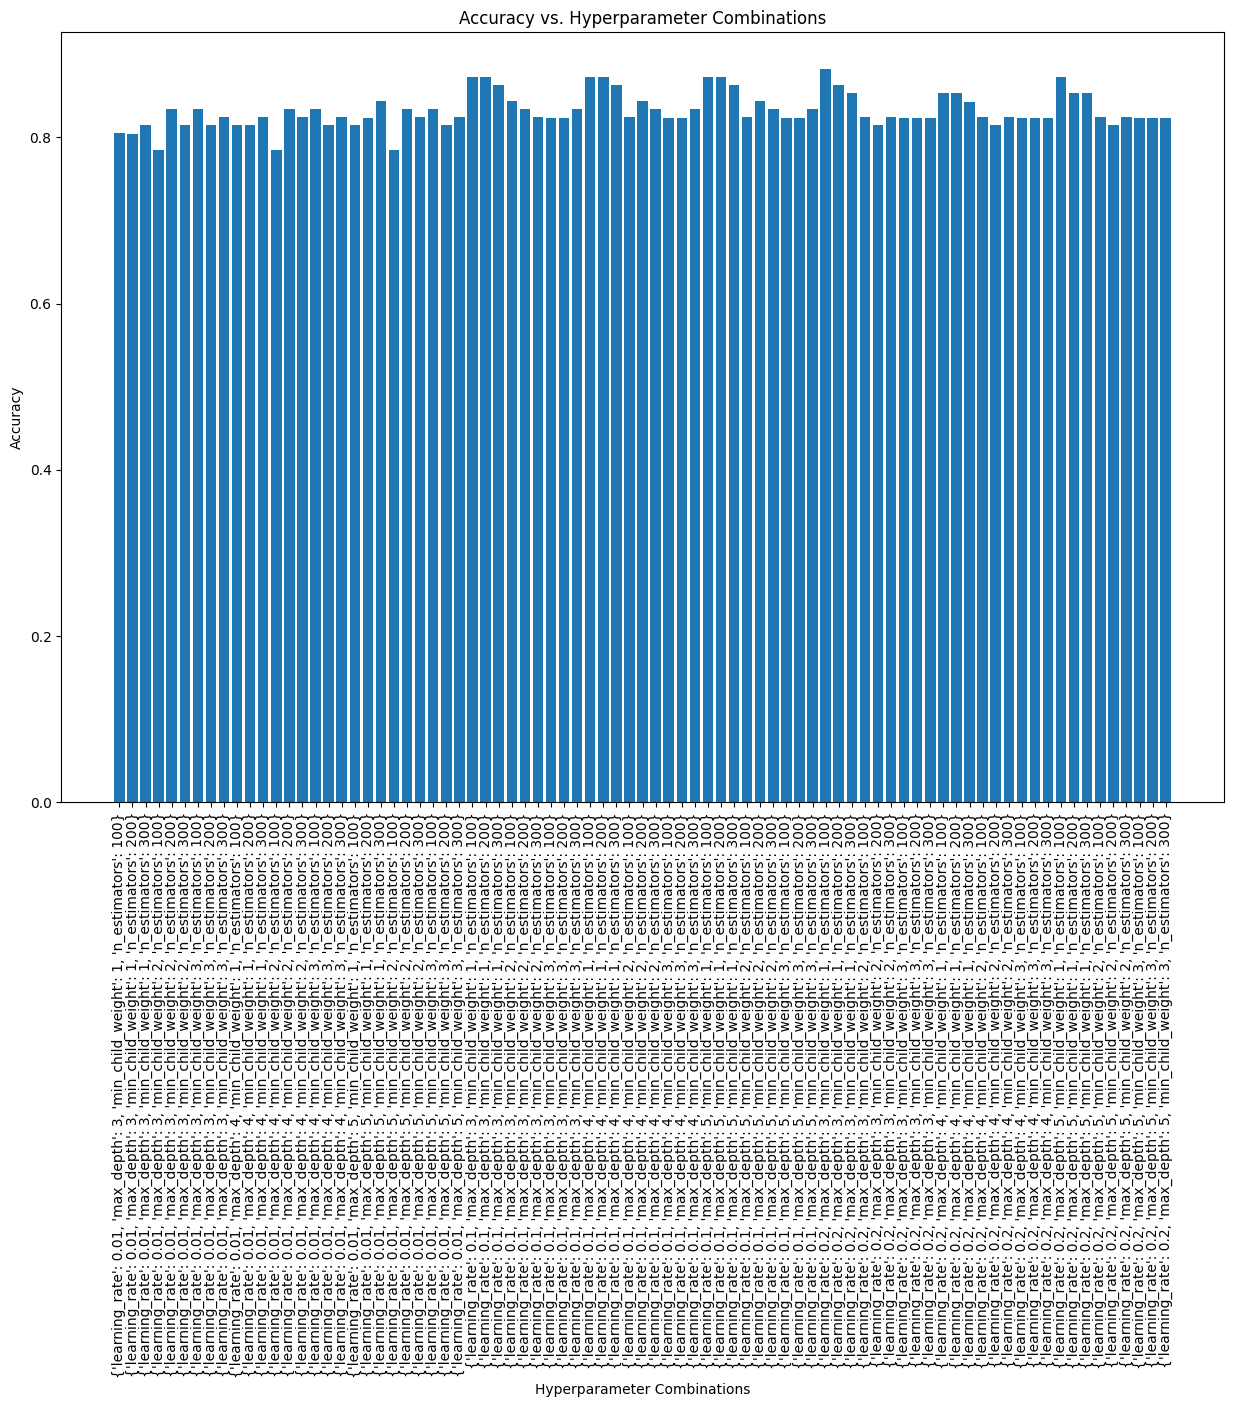

In [52]:
plt.figure(figsize=(15, 10))
x_values = [str(params) for params in param_combinations]
plt.xticks(rotation=90)
plt.bar(x_values, accuracy_scores)
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Hyperparameter Combinations')
plt.show()


#### Display which model perform best on Kyphosis dataset - NN model or XGBoost

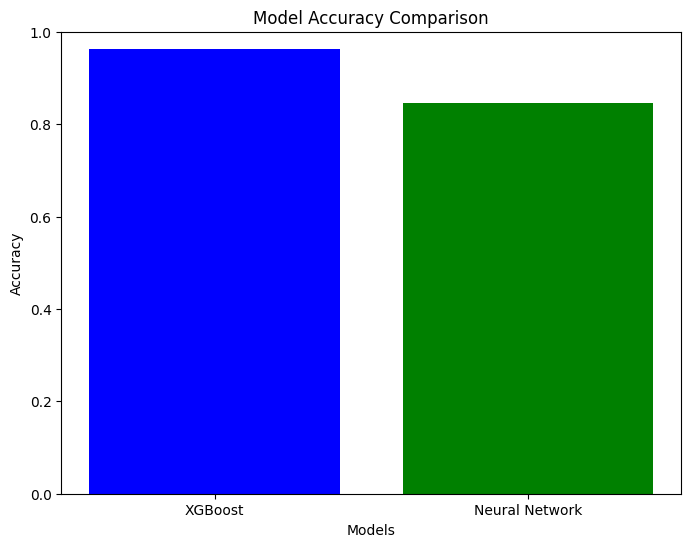

In [53]:
model_names = ['XGBoost', 'Neural Network']
accuracy_scores = [xgb_accuracy, accuracy]

# Create a bar chart to compare model accuracy
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits to the range [0, 1] for accuracy
plt.show()
